# Weather Dataset

**Objectives:** 
- Work with time-series weather data, calculate temperature averages, and
visualize seasonal changes.


---------------
## Import Libraries
---------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

--------------
## Load Dataset
------------------

In [2]:
df = pd.read_csv('D:/Bistartx Intership/Month-1/EDA_Weather_data/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


**We have 96453 rows and 12 columns in our dataset**

------------------

## Summary of Data
------------------
**Temperature (C):**
- Represents the actual recorded air temperature in degrees Celsius (°C).
- The values range from -21.82°C to 39.91°C.
- Mean temperature: 11.93°C.

**Apparent Temperature (C):**
- Also known as the "feels-like" temperature, it accounts for humidity and wind conditions.
- It can be lower or higher than actual temperature depending on wind chill or heat index.
- The values range from -27.72°C to 39.34°C.
- Mean apparent temperature: 10.86°C.

**Humidity:**
- Measures the amount of moisture in the air on a scale from 0 to 1 (where 1 = 100% humidity).
- The values range from 0.00 (completely dry) to 1.00 (fully saturated air).
- Mean humidity: 0.73 (73%).

**Wind Speed (km/h):**
- The speed of the wind at the time of measurement, in kilometers per hour.
- The values range from 0 km/h (no wind) to 63.85 km/h (strong wind).
- Mean wind speed: 10.81 km/h.

**Wind Bearing (degrees):**
- The direction from which the wind is coming, measured in degrees (0° to 359°).
- 0° = North, 90° = East, 180° = South, 270° = West.
- Mean wind bearing: 187.51° (mostly from the south).

**Visibility (km):**
- The distance one can see clearly, measured in kilometers.
- The values range from 0 km (very poor visibility) to 16.1 km (clear visibility).
- Mean visibility: 10.35 km.

**Loud Cover (Likely a typo, should be Cloud Cover):**
- Indicates how much of the sky is covered by clouds, usually on a scale from 0 to 1.
- In this dataset, it's 0.0 for all entries, which may indicate missing or irrelevant data.

**Pressure (millibars):**
- Atmospheric pressure at the time of measurement, in millibars (hPa).
- The values range from 0.00 (likely an error) to 1046.38 mb.
- Mean pressure: 1003.24 mb.

----------------

## Errors Handling
--------------

### Deal with missing values

<Figure size 800x600 with 0 Axes>

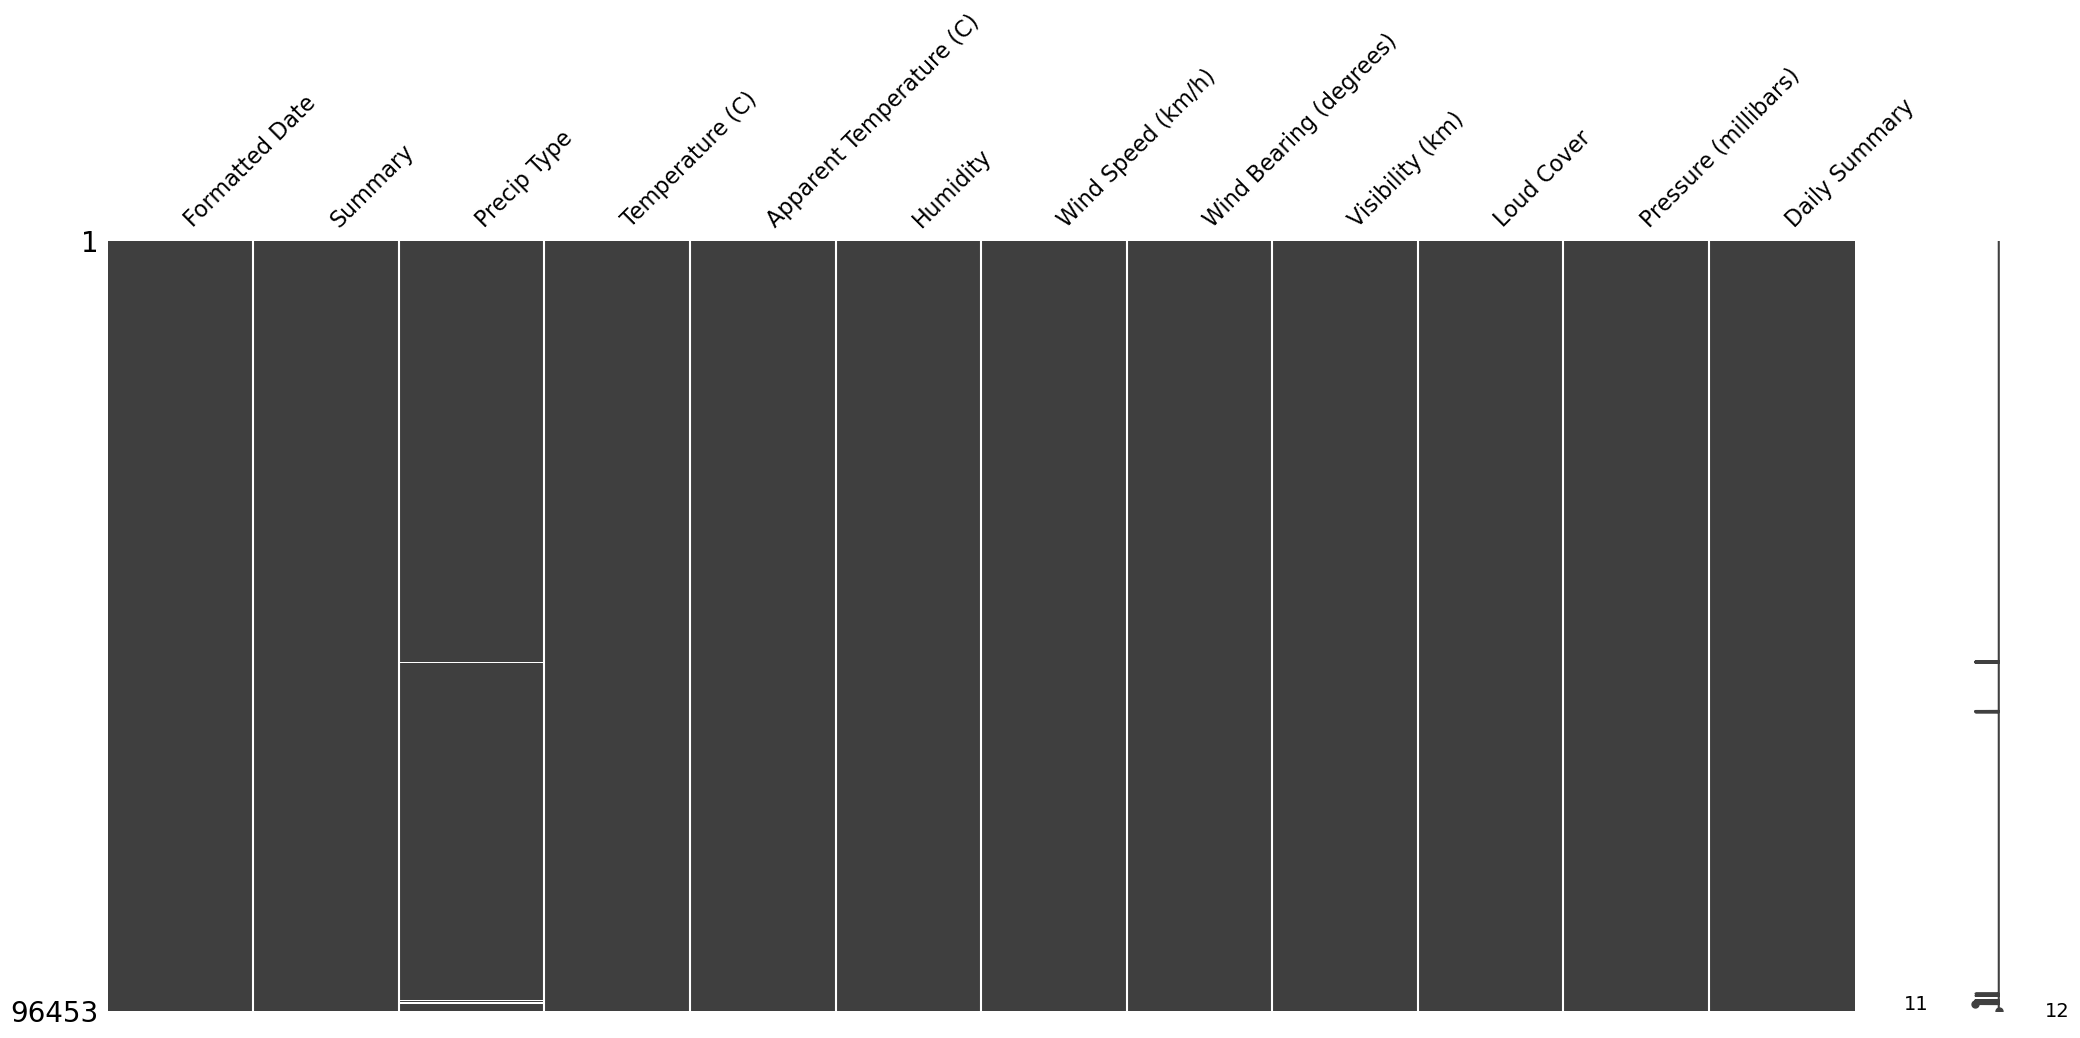

In [4]:
plt.figure(figsize=(8,6))
msno.matrix(df)
plt.show()

In [5]:
missing = df.isnull().mean() * 100
missing.sort_values(ascending=False)

Precip Type                 0.536012
Formatted Date              0.000000
Summary                     0.000000
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

In [6]:
df['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

**Only 0.53% of the data is missing, rain value are to much so we impute with `rain`.**

In [7]:
df['Precip Type'].mode()[0]

'rain'

In [8]:
df['Precip Type'] = df['Precip Type'].fillna(value='rain')
df.isnull().mean() * 100

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

------------

### Deal with inconsistent data

**Loud Cover**

In [9]:
df['Loud Cover'].value_counts()

Loud Cover
0.0    96453
Name: count, dtype: int64

**In this dataset, it's 0.0 for all entries, which may indicate missing or irrelevant data. So no useful information we can take from this column. We drop this column**


In [10]:
df.drop(columns=['Loud Cover'], axis= 1, inplace= True)

**Formatted Date**

In [11]:
df['Formatted Date'].value_counts().head()

Formatted Date
2010-08-02 00:00:00.000 +0200    2
2010-08-02 12:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
Name: count, dtype: int64

**The "Formatted Date" column represents the timestamp of each weather observation**
- 2010-08-02 → The date in YYYY-MM-DD format (Year-Month-Day).
- 00:00:00.000 → The time in HH:MM:SS.sss format (Hour:Minute:Second.Milliseconds).
- +0200 → The timezone offset from UTC (Coordinated Universal Time).

So we break down that column into Year-Month-Day, Extract time, and timezone offset.

In [12]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

Extarct Year-Month-Day

In [13]:
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day_name()

In [14]:
col = ['Year', 'Month', 'Day']
for i in col:
    print(df[i].value_counts())
    print('--------')

Year
2010    8784
2008    8784
2012    8784
2016    8783
2006    8760
2007    8760
2009    8760
2011    8760
2013    8760
2015    8760
2014    8757
2005       1
Name: count, dtype: int64
--------
Month
8     8208
3     8184
12    8184
1     8184
5     8184
10    8184
7     8181
4     7920
11    7920
6     7920
9     7920
2     7464
Name: count, dtype: int64
--------
Day
Monday       13797
Friday       13776
Saturday     13776
Sunday       13776
Tuesday      13776
Wednesday    13776
Thursday     13776
Name: count, dtype: int64
--------


**Observations**
- Year: The data spans from 2005 to 2016. There are 12 years of data.
- Month: The data covers all 12 months of the year.
- Day: Something interesting to note is that the day values are uniformaly distributed.

**The data is recorded for 24hrs interval. Only hrs data is recorded, no minutes and seconds are recorded. Also the data is uniformaly distributed.**

**Extract Hour**

In [15]:
df['Hour'] = df['Formatted Date'].dt.hour

In [16]:
df['Hour'].value_counts()

Hour
10    4019
11    4019
20    4019
19    4019
18    4019
17    4019
16    4019
15    4019
14    4019
13    4019
12    4019
21    4019
9     4019
8     4019
7     4019
6     4019
5     4019
4     4019
3     4019
2     4019
1     4019
23    4018
0     4018
22    4018
Name: count, dtype: int64

**Pressure (millibars)**

In [17]:
df['Pressure (millibars)'].describe()

count    96453.000000
mean      1003.235956
std        116.969906
min          0.000000
25%       1011.900000
50%       1016.450000
75%       1021.090000
max       1046.380000
Name: Pressure (millibars), dtype: float64

- A 0 mb pressure would mean a perfect vacuum, which does not naturally occur on Earth's surface or atmosphere.
- The lowest pressure recorded on Earth's surface is approximately 870 mb.
- It is a wrong data.

In [18]:
df[df['Pressure (millibars)'] < 900]['Pressure (millibars)'].count()

1288

**We have 1288 rows wrong information** 

In [19]:
print(f'The total number of rows and columns are: {df.shape}')
print(f'The total number of effected rows are: {df[df['Pressure (millibars)'] < 900].shape[0]}')
print(f'The effected rows percentage is: {(1288 / 96453) * 100}')

The total number of rows and columns are: (96453, 15)
The total number of effected rows are: 1288
The effected rows percentage is: 1.3353654111328834


**Since it's weather data and the percentage of missing values is only ~1.34%, the best approach is to drop those rows instead of filling them with estimated values.**

In [20]:
df = df[df['Pressure (millibars)'] != 0]

**Summary and Daily Summary values are same so we can remove one of them**

In [21]:
df = df.drop(columns=['Daily Summary'], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95165 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95165 non-null  datetime64[ns, UTC]
 1   Summary                   95165 non-null  object             
 2   Precip Type               95165 non-null  object             
 3   Temperature (C)           95165 non-null  float64            
 4   Apparent Temperature (C)  95165 non-null  float64            
 5   Humidity                  95165 non-null  float64            
 6   Wind Speed (km/h)         95165 non-null  float64            
 7   Wind Bearing (degrees)    95165 non-null  float64            
 8   Visibility (km)           95165 non-null  float64            
 9   Pressure (millibars)      95165 non-null  float64            
 10  Year                      95165 non-null  int32              
 11  Month               

----------------

### Deal with Duplicate Values

In [23]:
df.duplicated().sum()

24

In [24]:
df = df.drop_duplicates()

In [25]:
print(f'The total rows and columns in the dataset after droping the duplicates are: {df.shape}')
print(f'Total droped rows are: {96453 - 95141}')
print(f'Only {(1312 / 96453 ) * 100:.2f}% data droped from the dataset')

The total rows and columns in the dataset after droping the duplicates are: (95141, 14)
Total droped rows are: 1312
Only 1.36% data droped from the dataset


---------

### Deal with Outliers

In [26]:
num = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']
num

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

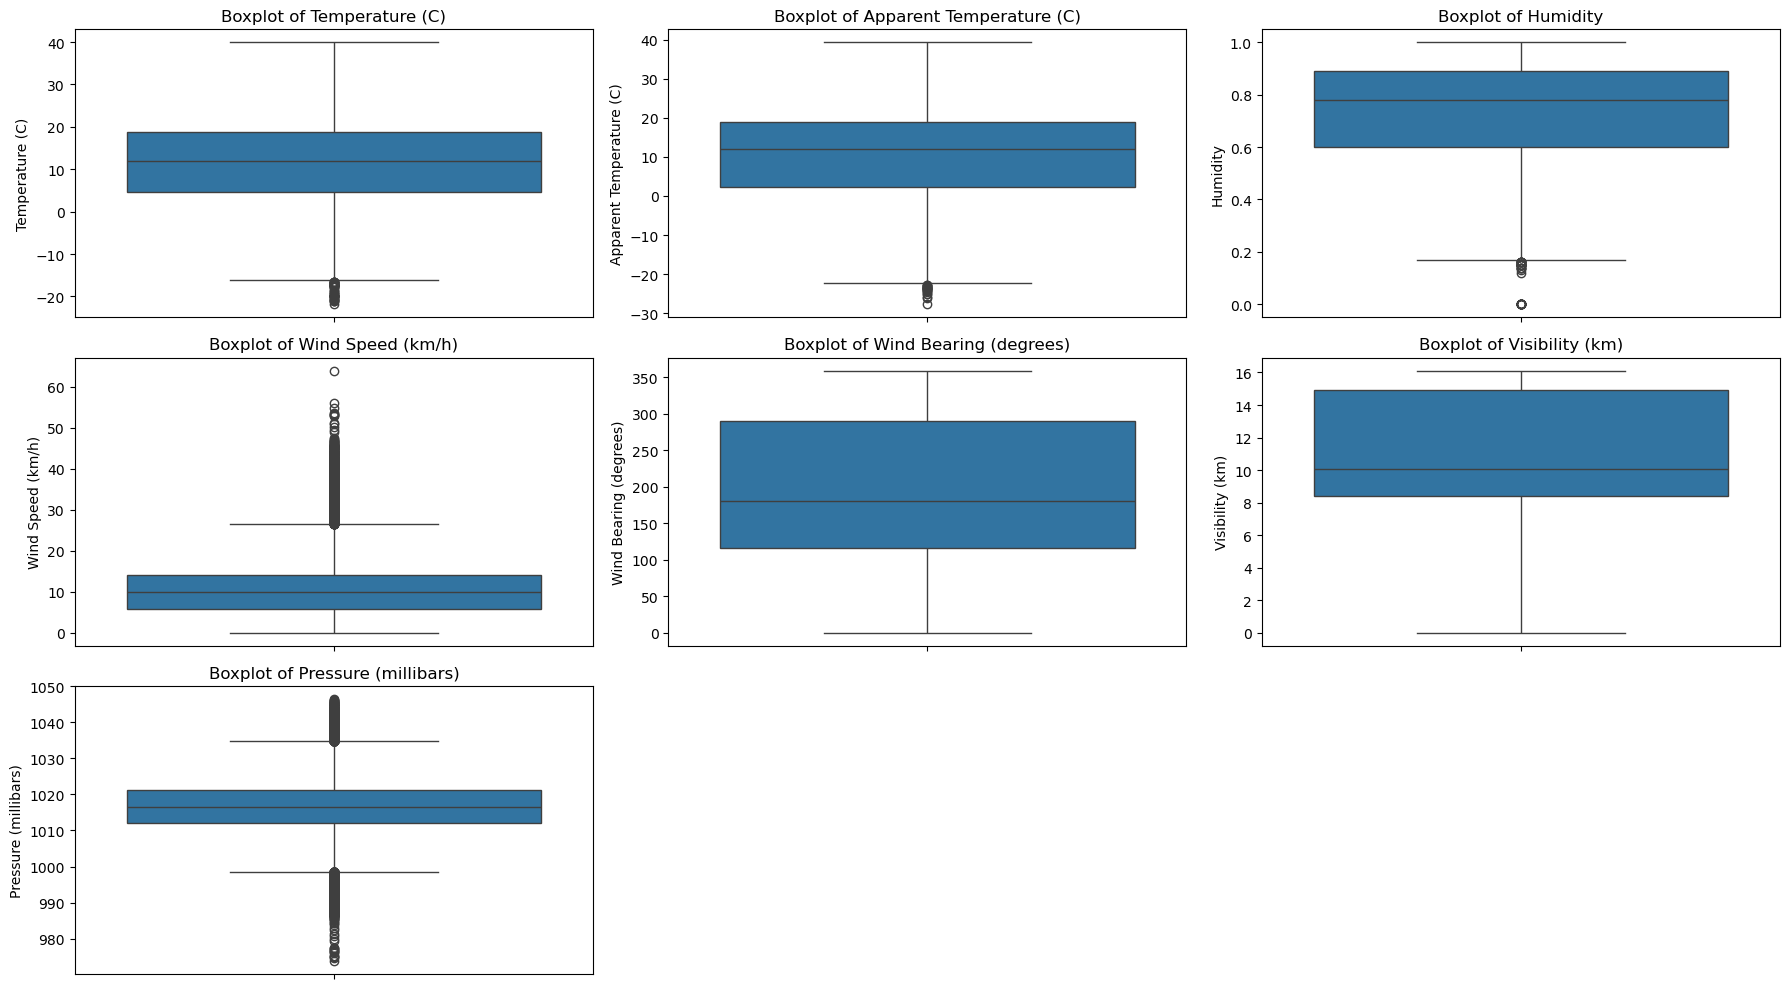

In [27]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(num):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [28]:
outliers = {}

for col in num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    
    outlier_count = df[(df[col] > upper_limit) | (df[col] < lower_limit)].shape[0]
    
    outliers[col] = outlier_count

    print(f"Column: {col}, Outlier Count: {outlier_count}")

Column: Temperature (C), Outlier Count: 44
Column: Apparent Temperature (C), Outlier Count: 22
Column: Humidity, Outlier Count: 46
Column: Wind Speed (km/h), Outlier Count: 2936
Column: Wind Bearing (degrees), Outlier Count: 0
Column: Visibility (km), Outlier Count: 0
Column: Pressure (millibars), Outlier Count: 3268


----------------
**Column: Temperature (C), Outlier Count: 44**
- These are valid points not outliers. The temperatures are recorded in Celsius and can range from -10 to 50 degrees Celsius in some regions.

**Column: Apparent Temperature (C), Outlier Count: 22**
- These are valid points not outliers. The apparent temperature is the temperature that the human body perceives, which can be different from the actual air temperature due to factors like humidity, wind, and solar radiation.

**Column: Humidity, Outlier Count: 46**
- Yes <0 are not possible in humidity. Humidity is a measure of the amount of water vapor present in the air, expressed as a percentage. 
- We remove < 0 values from humidity column.
  
**Column: Wind Speed (km/h), Outlier Count: 2936**
- Wind speed > 30km to 60km are possible in some regions. These are valid points not outliers.
  
**Column: Pressure (millibars), Outlier Count: 3268**
- Pressure < 1000 mb – Yes, occurs in low-pressure systems, storms, and cyclones.
- Pressure > 1035 mb – Yes, happens in strong high-pressure systems, often in winter.
-------------------

In [30]:
df = df[df['Humidity'] > 0]

In [31]:
df.shape

(95119, 14)

In [33]:
print(f'Total rows effected: {96453-95119}')
print(f'Percentage of rows effected: {(1334 / 96453) * 100:.2f}% out of 100')


Total rows effected: 1334
Percentage of rows effected: 1.38% out of 100


----------------

## Exploratory Data Analysis 

### Univariate Analysis - Numerical Features

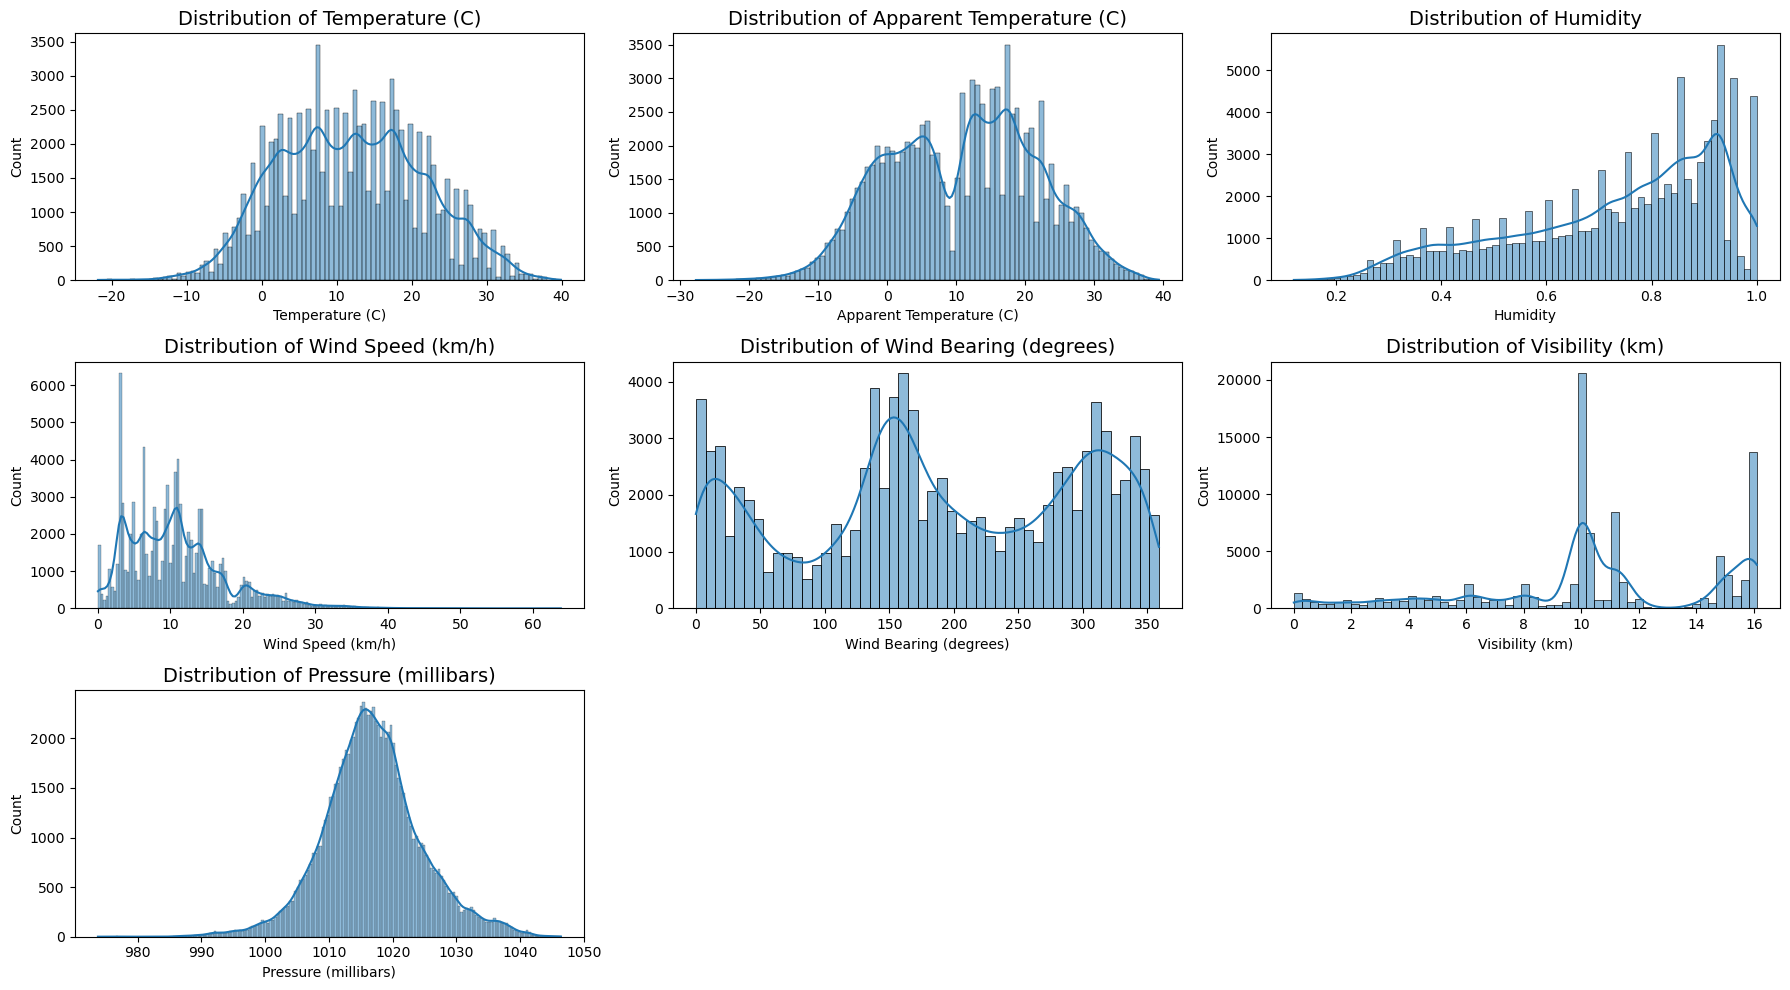

In [ ]:
num = ['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

plt.figure(figsize=(18,10))

for i, col in enumerate(num):
    ax = plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, ax=ax)
    plt.title(f'Distribution of {col}', fontsize=14)

plt.tight_layout()
plt.show()

------------
**Temperature(C)**
- The temperature data is roughly normally distributed.
- Most record temp values are between -5°C to +25°C.

**Apparent Temperature(C)**
- The apparent temperature data is also same as Temperature data.

**Humidity**
- The humidity data is Left Skewed.
- The values rise from 0.8 to 1.0.

**Wind Speed (km/h)**
- The wind speed data is Right Skewed.
- Mostly values are between 5 to 15 km/h.

**Pressure (millibars)**
- The pressure data normally distributed.
-----------

### Univariate Analysis - Categorical Features

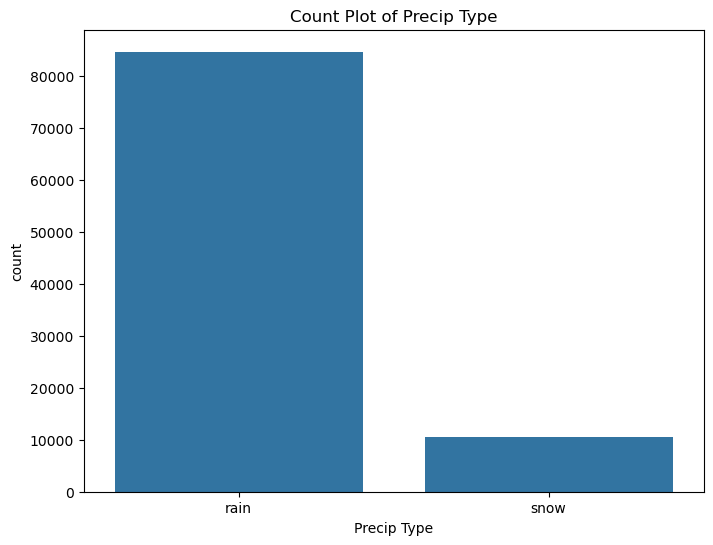

In [45]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)
sns.countplot(data=df, x='Precip Type', ax=ax)
plt.title(f'Count Plot of {'Precip Type'}')

plt.tight_layout
plt.show()

### Bivariate Analysis


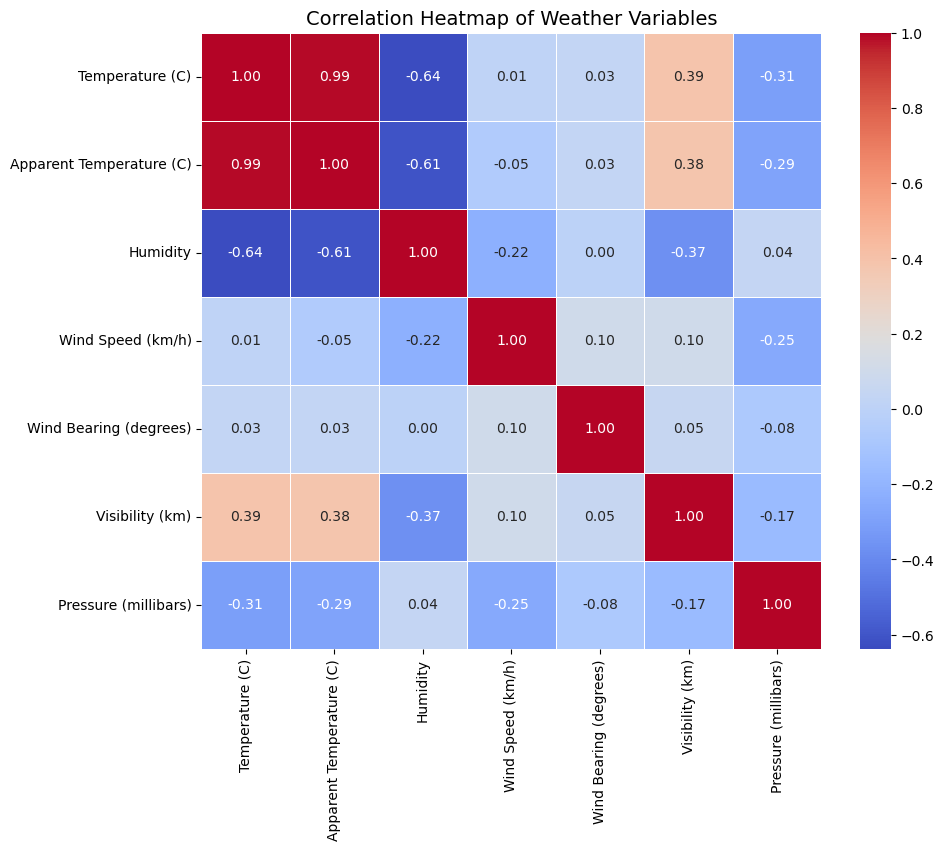

In [54]:
corr_matrix = df[num].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Weather Variables", fontsize=14)
plt.show()

-------------
**Temperature VS Humidity**
- A correlation of -0.64 between Temperature (C) and Humidity suggests a moderate to strong negative correlation.
- As temperature increases, humidity tends to decrease.
- As temperature decreases, humidity tends to increase.

**Wind Speed VS Humidity & Pressure**
- A correlation of -0.22 between Wind Speed and Humidity, and -0.25 between Wind Speed and Pressure.
- Stronger winds can dry out the air by mixing drier and more humid air.
- High humidity often occurs in calm conditions, while strong winds bring drier air.
- Storms & cyclones have high wind speeds, but their humidity depends on the system type (e.g., dry vs. wet storm).

**Visibility VS Temperature**
- As temperature increases, visibility tends to increase.
- Warm air holds less moisture-related obstructions (fog, mist).
- Colder temperatures can cause fog/haze, reducing visibility.
- Hotter days often have clearer skies with better visibility.

**Visibility VS Humidity**
- As humidity increases, visibility tends to decrease.
- High humidity can lead to fog, mist, or haze, reducing visibility.
- Drier air (low humidity) allows for clearer conditions.
- Coastal or tropical areas with high humidity often experience lower visibility due to moisture in the air.
-----------

**Temperature VS Humidity**

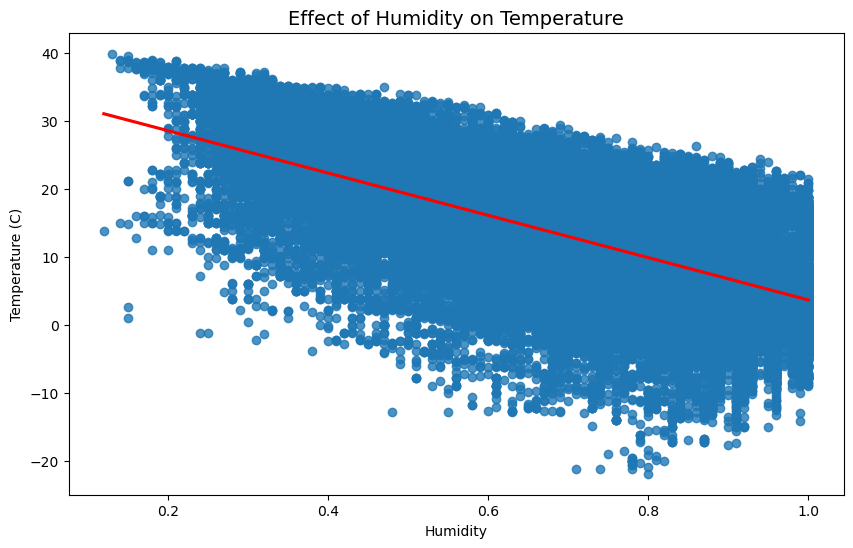

In [59]:
plt.figure(figsize=(10,6))

sns.regplot(data=df, x='Humidity', y='Temperature (C)', line_kws={'color':'red'})

plt.title('Effect of Humidity on Temperature', fontsize=14)
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()

**Observation**
- Higher temperatures lead to lower humidity because warm air can hold more moisture, reducing relative humidity.
- Higher humidity is associated with lower temperatures as increased moisture in the air often leads to cooling effects, cloud formation, or precipitation.
-----------------

**Wind Speed VS Pressure**

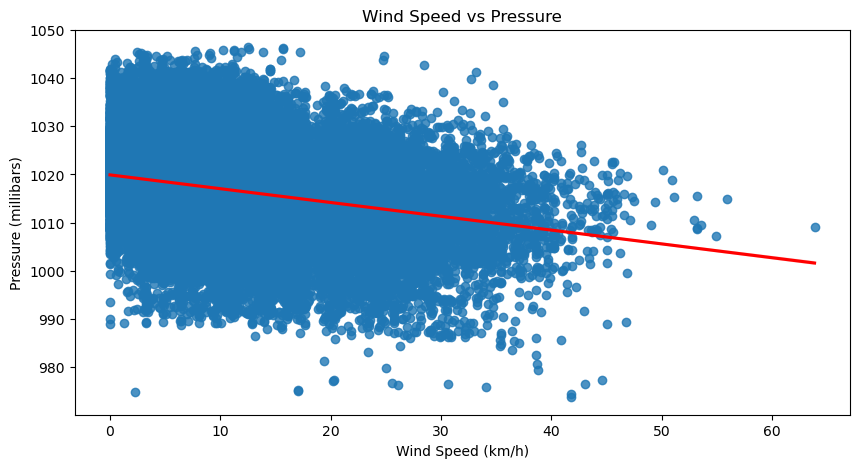

In [62]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Wind Speed (km/h)', y='Pressure (millibars)', line_kws={'color':'red'})

plt.title('Wind Speed vs Pressure')
plt.show()

**Observation**
- Higher wind speeds are generally associated with lower pressure, as strong winds often occur in low-pressure systems like storms and cyclones.
- Higher pressure is typically linked to lower wind speeds, as high-pressure systems bring stable and calmer weather conditions.
-------------

**Visibility VS Humidity**

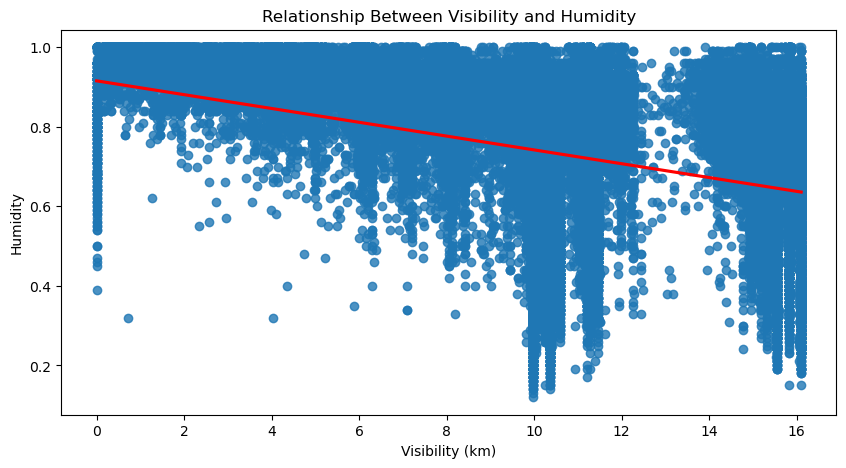

In [66]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Visibility (km)', y='Humidity', line_kws={'color':'red'})

plt.title('Relationship Between Visibility and Humidity')
plt.show()

**Observation**
- Low visibility is often associated with high humidity, as moisture in the air can lead to fog, mist, or haze, reducing how far one can see.
- High visibility typically occurs with low humidity, as dry air conditions lead to clearer skies and less atmospheric obstruction.
---------------

**Pressure VS Temperature**

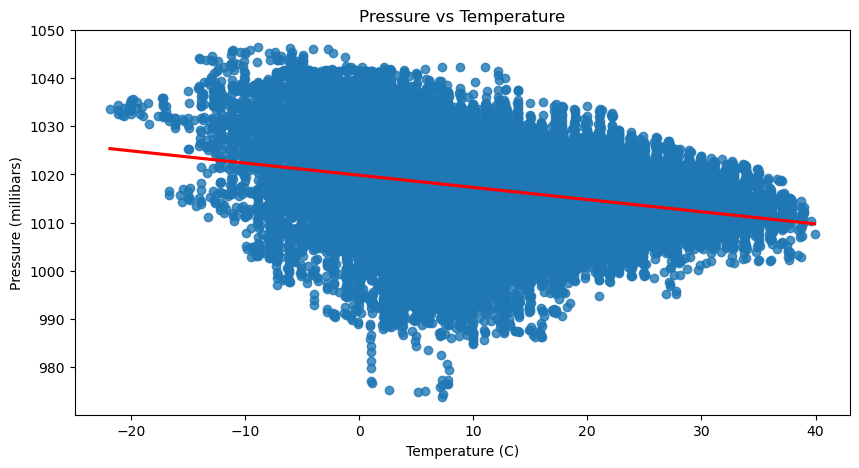

In [68]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Temperature (C)', y='Pressure (millibars)', line_kws={'color':'red'})

plt.title('Pressure vs Temperature')
plt.show()

**Observation**
- Higher temperatures are generally associated with lower pressure, as warm air expands, becomes less dense, and rises, leading to lower atmospheric pressure.
- Higher pressure is typically linked to lower temperatures, as high-pressure systems bring cooler, denser air that sinks and stabilizes weather conditions.
-----------

**season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}**

In [33]:
df['season'] = df['Month'] % 12 // 3 + 1
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_mapping)

**Calculate Temperature Averages**

In [35]:
monthly_avg_temp =df.groupby('Month')['Temperature (C)'].mean().sort_values(ascending=False)
monthly_avg_temp

Month
7     22.943994
8     22.353799
6     20.697367
9     17.478120
5     16.867761
4     12.766871
10    11.350116
3      6.936920
11     6.598639
2      2.172700
12     1.909140
1      1.060046
Name: Temperature (C), dtype: float64

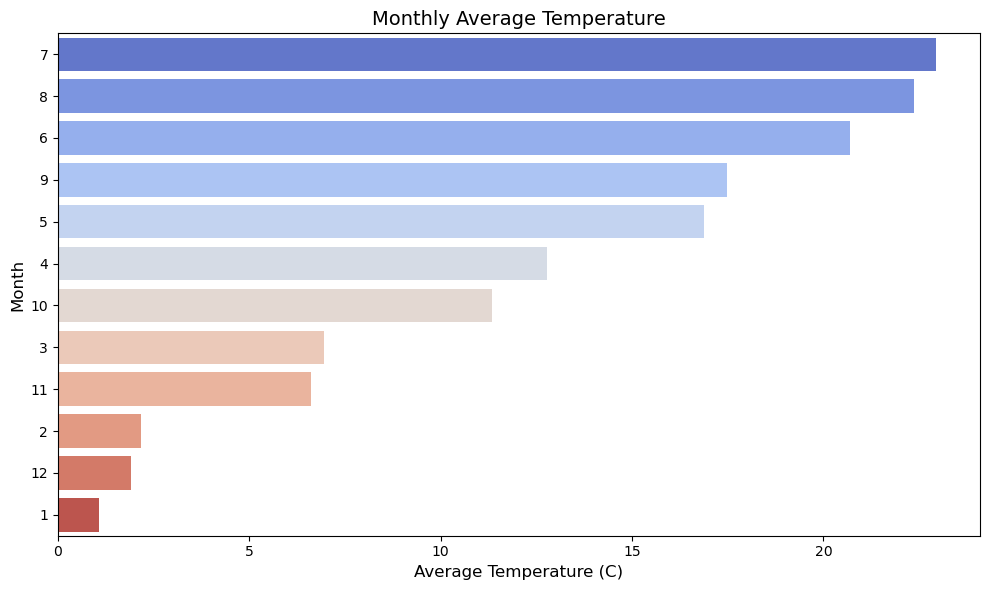

In [36]:
# Monthly Average Temperature
monthly_avg_temp =df.groupby('Month')['Temperature (C)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=monthly_avg_temp.index, x=monthly_avg_temp.values, order=monthly_avg_temp.index,
            orient='h', palette='coolwarm')
plt.title('Monthly Average Temperature', fontsize=14)
plt.xlabel('Average Temperature (C)', fontsize=12)
plt.ylabel('Month', fontsize=12)

plt.tight_layout()
plt.show()
